# FIFA 22 Ultimate Team Visuals

In [2]:
# imports
import altair as alt
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))
# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

# custom imports
from src.helpers import get_data

In [3]:
# This is the read data section
data_path = "data/player_raw_data.csv"
# this is raw data (EDA usage)
fifa = get_data(data_path)
fifa.head()
# this is processed data (Task visualizations)
fifa_processed = get_data(data_path, preprocess=True)

In [4]:
# retunrs the data size
print(f"\nThe data is of size {fifa.shape}")

# get all column names to see what attributes exists for usage
fifa.columns


The data is of size (12045, 51)


Index(['name', 'first_name', 'last_name', 'country', 'age', 'overall',
       'potential', 'club', 'best_position', 'value', 'wage', 'total_stats',
       'preferred_foot', 'weak_foot', 'skill_move', 'work_rate', 'height',
       'weight', 'crossing', 'finishing', 'heading_accuracy', 'short_passing',
       'volleys', 'dribbling', 'curve', 'fk_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'defensive_awareness', 'standing_tackle', 'sliding_tackle',
       'diving', 'handling', 'kicking', 'reflexes'],
      dtype='object')

In [5]:
fifa.describe()

,age,overall,potential,value,wage,total_stats,weak_foot,skill_move,height,weight,...,vision,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle,diving,handling,kicking,reflexes
count,12045.000000,12045.000000,12045.000000,1.204500e+04,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,...,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000,12045.000000
mean,22.641926,63.942300,71.526276,3.112240e+06,8703.233707,1554.797841,2.903694,2.331424,180.883271,74.289083,...,52.649564,47.372022,55.625903,43.866916,46.250062,44.337650,15.723122,15.545953,15.437443,15.794770
std,4.447885,8.010998,6.411217,8.638606e+06,21220.895275,287.420346,0.665881,0.767736,6.972903,7.176728,...,13.775595,15.973975,13.048832,20.420191,21.086884,20.468369,16.586052,15.951656,15.738402,16.921706
min,16.000000,44.000000,47.000000,0.000000e+00,0.000000,761.000000,1.000000,1.000000,149.000000,0.000000,...,12.000000,7.000000,13.000000,4.000000,7.000000,6.000000,2.000000,2.000000,2.000000,2.000000
25%,19.000000,58.000000,67.000000,3.750000e+05,550.000000,1404.000000,3.000000,2.000000,176.000000,70.000000,...,43.000000,38.000000,47.000000,26.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000
50%,22.000000,63.000000,71.000000,8.250000e+05,2000.000000,1571.000000,3.000000,2.000000,181.000000,74.000000,...,54.000000,48.000000,56.000000,48.000000,52.000000,50.000000,11.000000,11.000000,11.000000,11.000000
75%,25.000000,69.000000,76.000000,2.000000e+06,6000.000000,1746.000000,3.000000,3.000000,186.000000,79.000000,...,63.000000,59.000000,65.000000,60.000000,64.000000,61.000000,14.000000,14.000000,14.000000,14.000000
max,54.000000,92.000000,95.000000,1.940000e+08,450000.000000,2318.000000,5.000000,5.000000,206.000000,99.000000,...,95.000000,92.000000,96.000000,92.000000,93.000000,90.000000,90.000000,90.000000,93.000000,90.000000


In [6]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12045 entries, 0 to 12044
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 12045 non-null  object
 1   first_name           12045 non-null  object
 2   last_name            12045 non-null  object
 3   country              12045 non-null  object
 4   age                  12045 non-null  int64 
 5   overall              12045 non-null  int64 
 6   potential            12045 non-null  int64 
 7   club                 11972 non-null  object
 8   best_position        12045 non-null  object
 9   value                12045 non-null  int64 
 10  wage                 12045 non-null  int64 
 11  total_stats          12045 non-null  int64 
 12  preferred_foot       12045 non-null  object
 13  weak_foot            12045 non-null  int64 
 14  skill_move           12045 non-null  int64 
 15  work_rate            12045 non-null  object
 16  heig

### Tasks Milestone 1

Improvements Task 1:
- Consider selection filter by Region (preffered this one)/Country(or country per each of the repeated single chart)
- The sorting of median requires manually pre-ordered levels (as a list of strings) of the attribute to be sorted. (Refer to assignment 5)
- Not necessary all countries have to appear, if they have too little counts/records, then could be omitted (or blank away by setting opacity to 0)
- Could only just show top 10/5 countries of the region as well

**NOTE**: The bullets are incorporated altogether and meant to work at the same time?

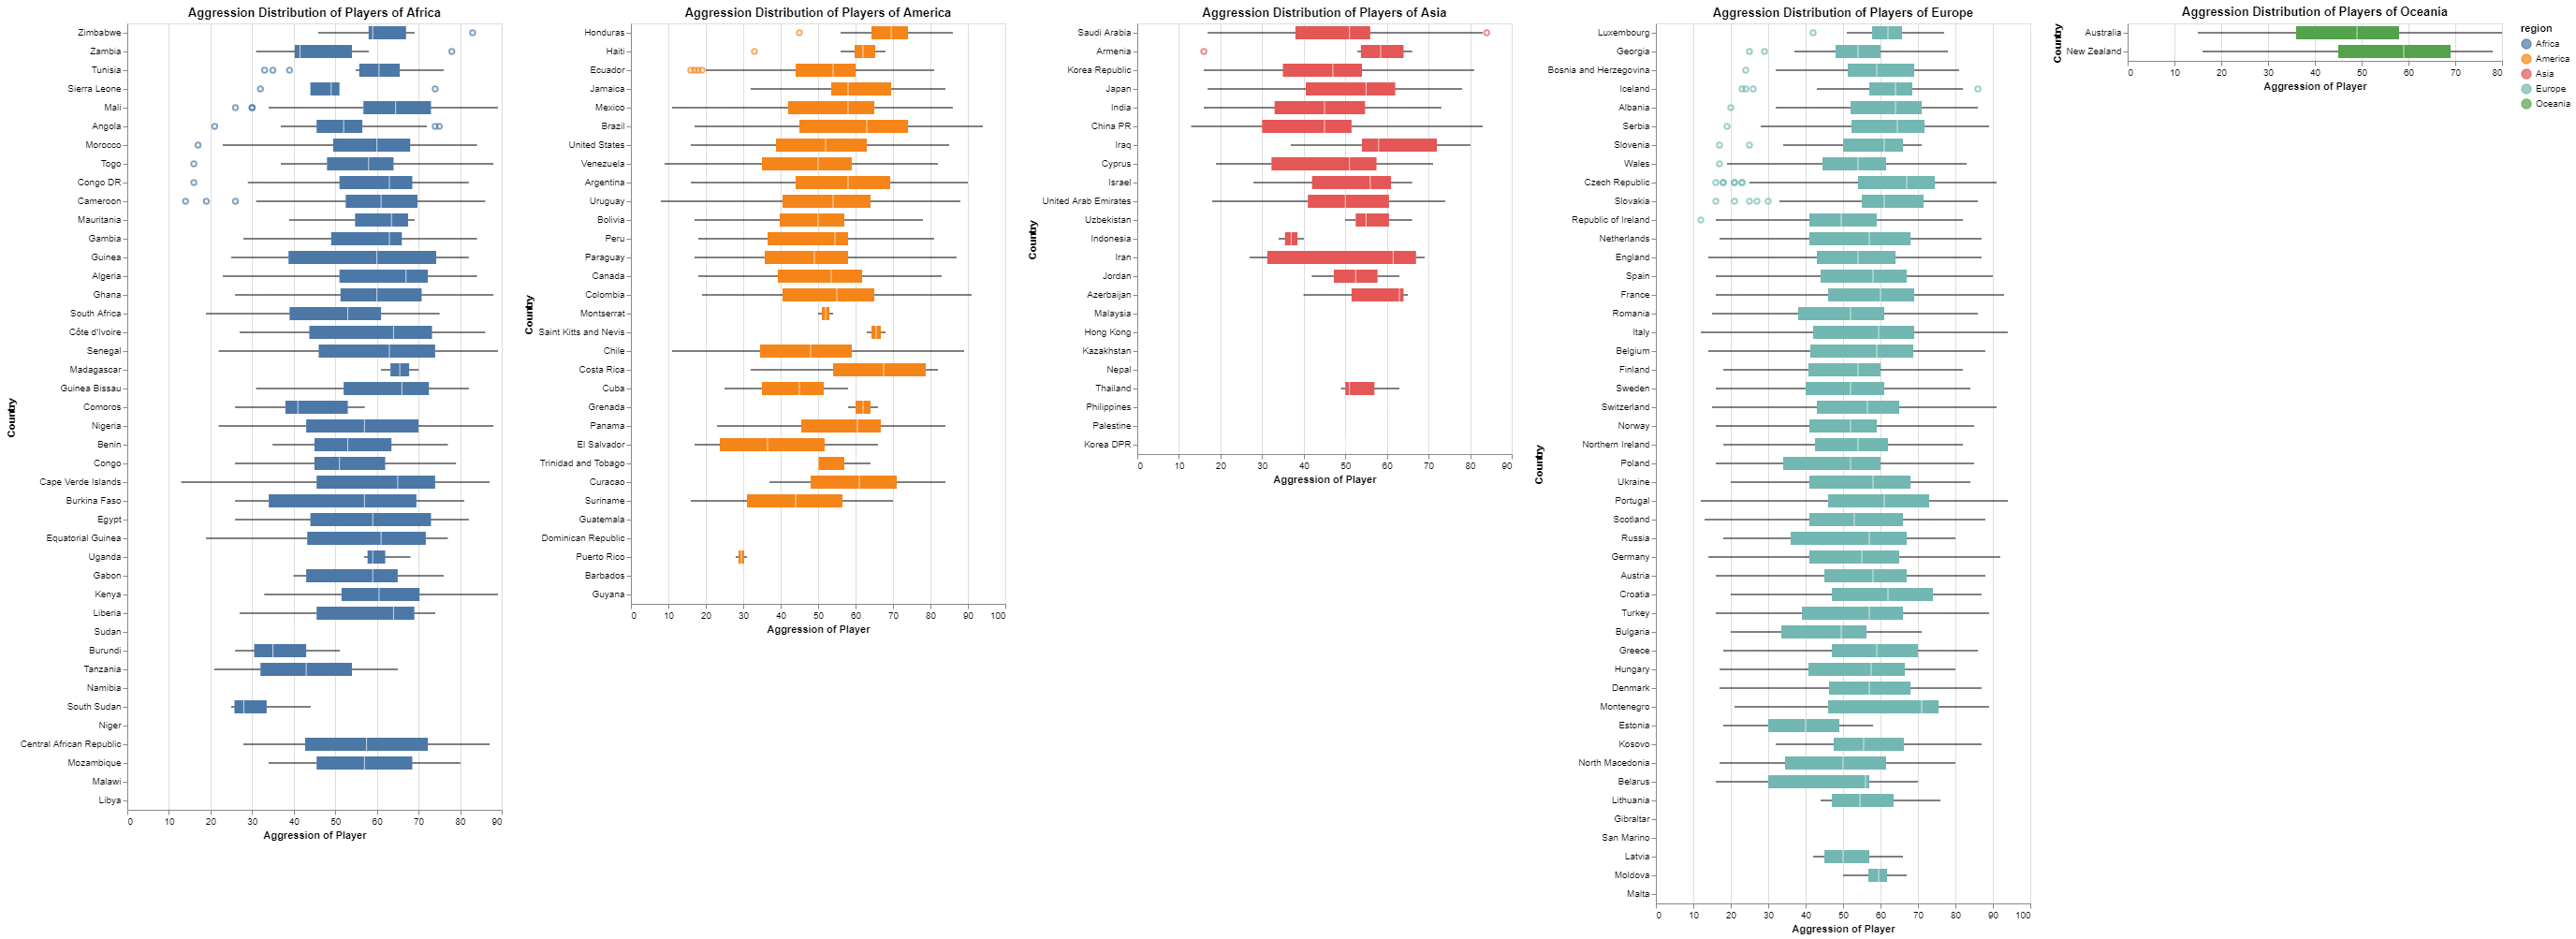

In [7]:
# 1. Find country where players are most aggressive
# Take top 5 countries, sorted by median (desc) (NOTE: NOT sorting properly now)

# create base plot
aggr_base = alt.Chart(fifa_processed).mark_boxplot().encode(
        x = alt.X("aggression", title="Aggression of Player"),
        y = alt.Y("country:N", title="Country", sort=alt.EncodingSortField(field="aggression", order="descending")),
        color = alt.Color("region")
)
# create chart basis to add aggr_base by horizontal concatenation
aggr_chart = alt.hconcat()
regions = sorted(fifa_processed.region.unique().tolist())
# honcat each of the base from different region filtered
for region in regions:
    aggr_chart |= aggr_base.transform_filter(
        alt.FieldEqualPredicate(field='region', equal = region)
    ).properties(
        title=f"Aggression Distribution of Players of {region}"
    )
aggr_chart

Improvements Task 2:
- Refer to one of the picture sent of whatsapp
- Could split chart into two/three views:
    + one is all wages, ranging from mininum to max
    + other is some wages, ranging from minimum to user-selected end point 
    + And above two stack together vertically?
    + Violin plots can zoom by changing the ranges
- Add another two more charts that are "weighted" by attribute 1 (one chart), attribute 2 (another chart), and these two could have selection filters on the wages violin plot
- Consider dropdown filter by region/country



In [8]:
def attribute_histogram(data):
    # base histogram, add selector later
    attr_hist = alt.Chart(data).mark_bar().encode(
        x = alt.X("value:Q", bin=alt.Bin(maxbins=50), title=None),
        y=alt.Y('count()', title="Count of Records"),
        color = "region:N",
        tooltip=['value', 'count()', 'region']
    ).properties(
        width=500,
        height=400,
        title="Attribute Distribution"
    )
    
    return attr_hist

In [9]:
def wage_vio_plt(data):
    wage_violin = alt.Chart(data).transform_density(
        'wage',
        extent=[10_000, 250_000],
        as_=['wage', 'density'],
        groupby=['region', 'attribute']
    ).mark_area(orient='horizontal').encode(
        y=alt.Y('wage:Q', title="Wage (Euros)"),
        color=alt.Color('region:N', title="Region"),
        x=alt.X(
            'density:Q',
            stack='center',
            impute=None,
            title=None,
            axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True),
        ),
        column=alt.Column(
            'region:N',
            title="Region",
            header=alt.Header(titleOrient='bottom', labelOrient='bottom', labelPadding=0)
        )
    ).properties(
        width=100,
        height=400,
        title="Wage Distribution By Region (Continent)"
    )
    
    return wage_violin

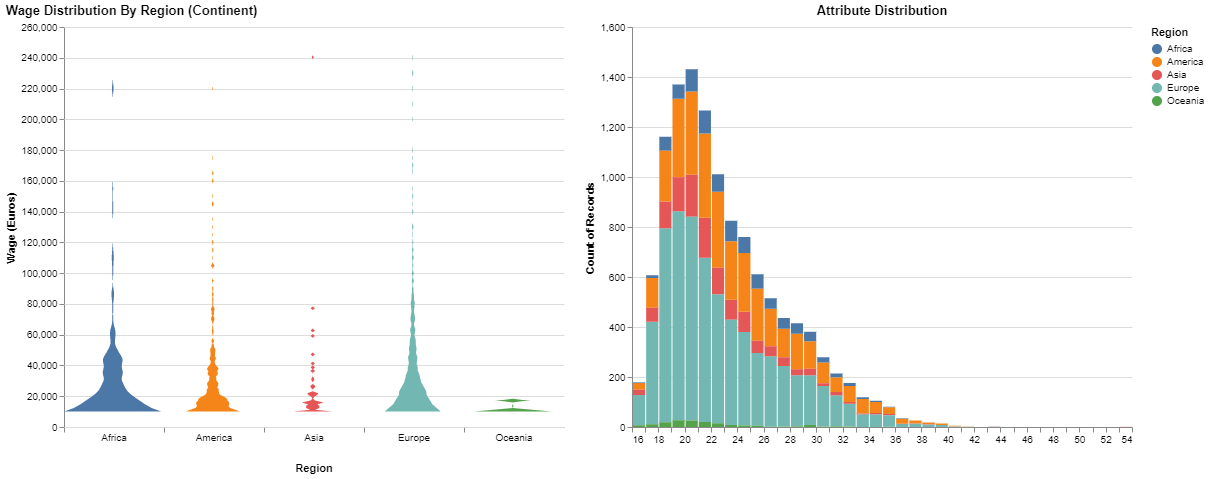

In [11]:
# using violet plot could be misleading, since max is 450_000, min is like 500
def task_two_viz(data):
    
    # get the attributes for options in the dropdown
    attributes = data.columns.tolist()[3:]
    attributes.remove("preferred_foot")
    attributes.remove('wage')
    # helper data to plot this attribute historgram
    helper_data = data.copy().melt(id_vars = ["country", "region", "wage"],  value_vars = attributes, var_name = "attribute", value_name = "value")
    
     # Click on the specfic Region
    click = alt.selection_multi(
        #empty='none',
        fields=['region'],
        bind='legend'
    )
    
    # Dropwdown menu, initial attribute is age
    dropdown = alt.selection_single(
        name="Select",
        init={"attribute": "age"},
        bind={"attribute": alt.binding_select(options=attributes),
             }
        )
    
    # slider
    brush = alt.selection_interval(
        encodings=["y"],
        resolve="global",
        empty="all"
    )

    # helper to create attribute histogram
    attr_hist = attribute_histogram(data=helper_data).add_selection(dropdown).add_selection(click).transform_filter(dropdown & brush & click)
    # helper to create wage violin plot
    wage_violin = wage_vio_plt(data=helper_data).encode(
        opacity = alt.condition(click, alt.value(1.0), alt.value(0.01))
    ).add_selection(brush).add_selection(click).transform_filter(dropdown)
    output = (wage_violin | attr_hist).configure_facet(
       spacing=0
    ).configure_view(
       stroke=None
    )
    return output
task2_plot = task_two_viz(data=fifa_processed)
task2_plot

Improvements Task 3:
- Try not to use color, since we only interested in checking correlation
- Have opacity filter when clicking
- Change size of points
- Careful with data size, the chart right now is using `data_size` * 0.5 of data points only, otherwise is too laggy
- Worse case scenario, use heatmap and compare changes to see which one is more persuasive of the task

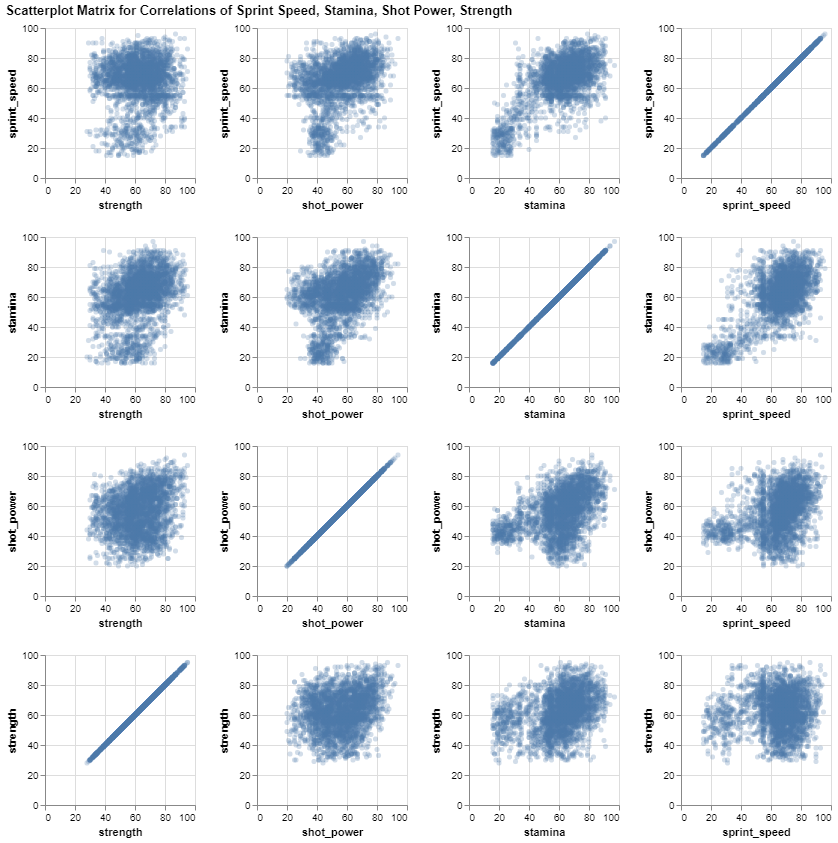

In [17]:
# 3. Explore/Compare correlation of sprint_speed & stamina, and shot power & strength (interactive)

# user-picked attributes to visualize
row_names = ["sprint_speed", "stamina", "shot_power", "strength"]
col_names = list(reversed(row_names))

# visualization of scatter matrix

# sample subset to have less data points

# parameter to control sample fraction 
frac = 0.25
fifa_sample = fifa_processed.sample(frac=frac, random_state=20230327)
scatter_matrix_4_attr = alt.Chart(fifa_sample).mark_circle(opacity=0.25, size = 25).encode(
    x = alt.X(alt.repeat("column"), type="quantitative"),
    y = alt.Y(alt.repeat("row"), type="quantitative")
).properties(
    width=150,
    height=150
).repeat(
    row = row_names,
    column = col_names,
    title=f"Scatterplot Matrix for Correlations of {', '.join(row_names).replace('_', ' ').title()}"
)

# interactive add by caution, otherwise very laggy

scatter_matrix_4_attr

Improvements Task 4:
- No need to facet by region, instead use dropdown for region / country
- Then facet by preferred_foot
- And, if you find it too simple, maybe we could modify task as well

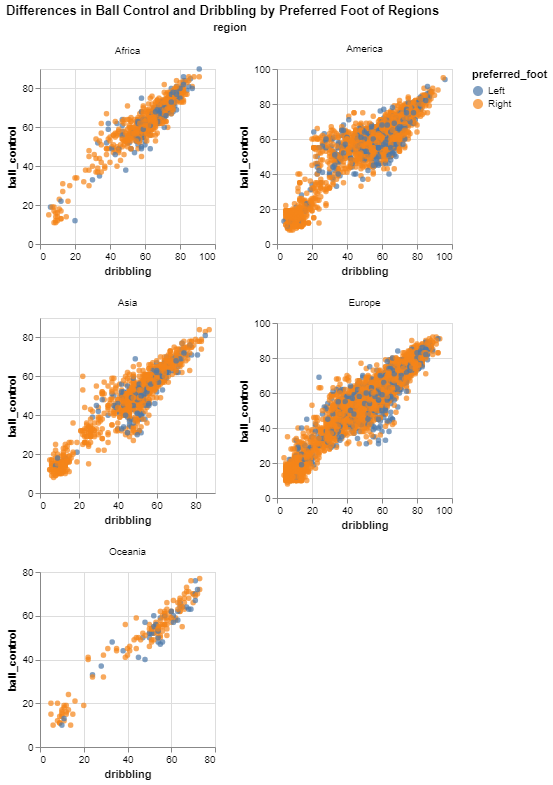

In [19]:
# 4.Explore the differences in ball control and dribbling between someone whose preferred leg is left vs right.
bc_dri_facet_plot = alt.Chart(fifa_processed).mark_circle().encode(
    x = alt.X("dribbling"),
    y = alt.Y("ball_control"),
    color = alt.Color("preferred_foot:N"),
    tooltip=["name", "dribbling", "ball_control"]
).properties(
    width = 175,
    height = 175
).facet(
    facet="region",
    columns=2,
    title="Differences in Ball Control and Dribbling by Preferred Foot of Regions"
).resolve_axis(
    x='independent',
    y='independent'
).resolve_scale(
    x='independent', 
    y='independent'
)

bc_dri_facet_plot

Improvements Task 5:
- Refer to whatsapp
- Composite of multi views/plots:
    + One is the height histogram 
    + One is the overall histogram (slidable)
    + Filter by dropdown country / region
    + Dropdown affects height and overall, overall also affects height
- Limit number of countries per region

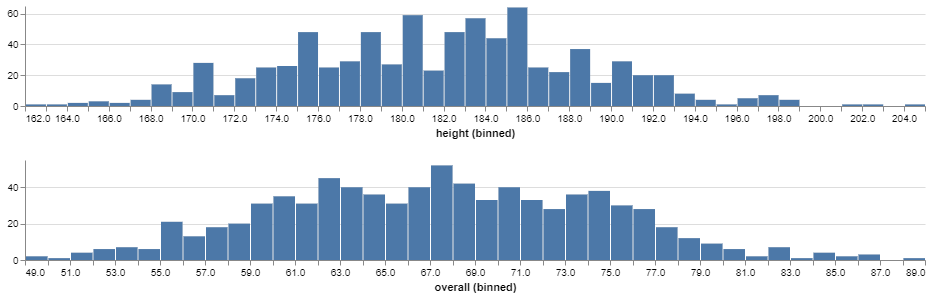

In [22]:
# 5. Find the range of height that has the best average overall ranking by country 
# (how to phrase this but just finding the best height for performance) (interactive)


def task_five_viz(data):
    # this is required processing to handle extra option of All regions together
    dup = data.copy()
    dup["country"] = "All"
    data = pd.concat([data, dup])
    
    # list of countries and countries
    countries = sorted(data.country.unique())
    countries.remove("All")
    countries.insert(0, "All")
    regions = sorted(data.region.unique())
    
    # slider
    brush = alt.selection_interval(
        encodings=["x"], # THis is hard to control both x and y, preferably use one encoding only
        resolve="global", # "intersect"
        empty="all" # add option to by default it selects all, to change this use "none" instead
    )
    
    # selector
    selection = alt.selection_single(
        name="Select",
        fields=["country", "region"],
        init={"country": "All", "region": "Africa"},
        bind={"country": alt.binding_select(options=countries),
              "region": alt.binding_radio(options=regions)
             }
    )
    
    # histogram for height and overall
    base_hist = alt.Chart(data).mark_bar().encode(
        x = alt.X(alt.repeat("row"), type="quantitative",
                  bin=alt.Bin(maxbins=50)
                 ),
        y = alt.Y('count():Q', title=None)
    )
    # adding these by layers and render it
    ovr_height_hist = alt.layer(base_hist.add_selection(brush).encode(
                                color=alt.value('lightgrey')
    ),
                    base_hist.transform_filter(brush)
    ).properties(
        width=900,
        height=100
    ).repeat(
        row=['height', 'overall'],
        data=data
    ).configure_view(
        stroke='transparent' # no outline
    ).add_selection(selection).transform_filter(selection) # add extra drop down
    # NOTE countries is not updating dynamically
    # Check this https://stackoverflow.com/questions/61754243/altair-controlling-one-dropdown-using-another
    return ovr_height_hist

viz = task_five_viz(data=fifa_processed) 
viz # use this instead
#viz.interactive() # THiS is extremely hard to control use wisely